In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.3f}'.format

# pd.options.display.max_columns()


In [9]:
df = pd.read_csv("customer_segmentation.csv")

In [10]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [15]:
list(df.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [ ]:
df.isna().sum()

# We can see that income has 24 missing values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [40]:
# drop nas'
df.dropna(inplace= True)

In [43]:
df.shape

(2216, 29)

### What is the overall summary of the numerical features?

In [50]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,...,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000
mean,5588.353,1968.820,52247.251,0.442,0.505,49.013,305.092,26.356,166.996,37.638,...,0.074,0.074,0.073,0.064,0.014,0.009,3.000,11.000,0.150,56.180
std,3249.376,11.986,25173.077,0.537,0.544,28.948,337.328,39.794,224.283,54.752,...,0.261,0.262,0.260,0.245,0.116,0.097,0.000,0.000,0.357,11.986
min,0.000,1893.000,1730.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000,29.000
25%,2814.750,1959.000,35303.000,0.000,0.000,24.000,24.000,2.000,16.000,3.000,...,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000,48.000
50%,5458.500,1970.000,51381.500,0.000,0.000,49.000,174.500,8.000,68.000,12.000,...,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000,55.000
75%,8421.750,1977.000,68522.000,1.000,1.000,74.000,505.000,33.000,232.250,50.000,...,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000,66.000
max,11191.000,1996.000,666666.000,2.000,2.000,99.000,1493.000,199.000,1725.000,259.000,...,1.000,1.000,1.000,1.000,1.000,1.000,3.000,11.000,1.000,132.000


In [46]:
df["Age"].head()

0    68
1    71
2    60
3    41
4    44
Name: Age, dtype: int64

### What are the various categories in the categorical features?

In [53]:
# df[["Education",'Marital_Status']].value_counts()
df["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [54]:
df["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [58]:
cat_col = []
for col in df.columns:

    if df[f"{col}"].nunique() < 10:
        cat_col.append(col)
    else:
        pass
cat_col

['Education',
 'Marital_Status',
 'Kidhome',
 'Teenhome',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [63]:
for col in cat_col:
    print(df[f"{col}"].value_counts())
    print()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Kidhome
0    1283
1     887
2      46
Name: count, dtype: int64

Teenhome
0    1147
1    1018
2      51
Name: count, dtype: int64

AcceptedCmp3
0    2053
1     163
Name: count, dtype: int64

AcceptedCmp4
0    2052
1     164
Name: count, dtype: int64

AcceptedCmp5
0    2054
1     162
Name: count, dtype: int64

AcceptedCmp1
0    2074
1     142
Name: count, dtype: int64

AcceptedCmp2
0    2186
1      30
Name: count, dtype: int64

Complain
0    2195
1      21
Name: count, dtype: int64

Z_CostContact
3    2216
Name: count, dtype: int64

Z_Revenue
11    2216
Name: count, dtype: int64

Response
0    1883
1     333
Name: count, dtype: int64



### Data Cleaning and Feature Engineering

In [71]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst= True)

In [91]:
df["Age"] = 2015 - df["Year_Birth"]

df["Dt_Customer"].max()

Timestamp('2014-06-29 00:00:00')

In [74]:
df["Total_Children"] = df["Kidhome"] + df["Teenhome"]

In [ ]:
spend_cols = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

df["Total_Spending"] = df[spend_cols].sum(axis= 1)


In [95]:
df["Total_Spending"].head()

0    1617
1      27
2     776
3      53
4     422
Name: Total_Spending, dtype: int64

In [96]:
df["Customer_Since"] = (pd.Timestamp("today") - df["Dt_Customer"]).dt.days

## Exploratory Data Analysis

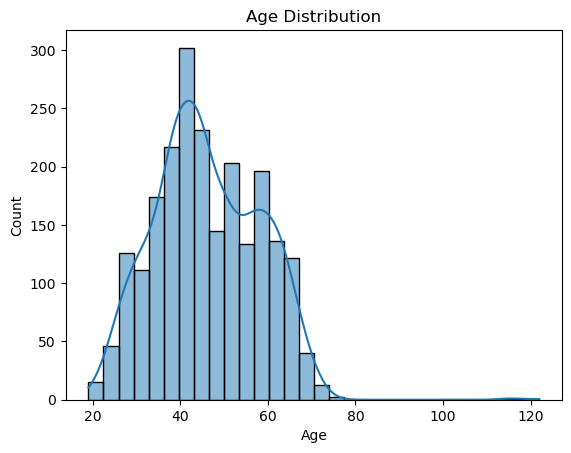

In [92]:
sns.histplot(df["Age"], bins= 30, kde= True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count");

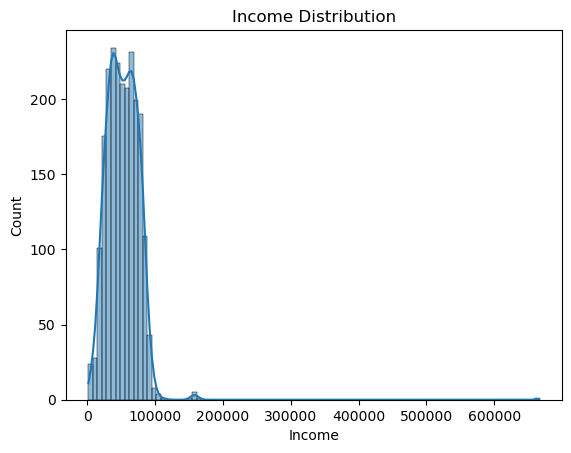

In [102]:
sns.histplot(df["Income"], bins= 100, kde= True)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count");

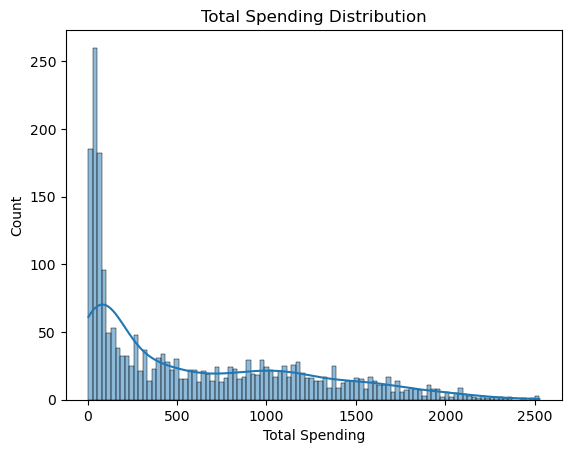

In [103]:
sns.histplot(df["Total_Spending"], bins= 100, kde= True)
plt.title("Total Spending Distribution")
plt.xlabel("Total Spending")
plt.ylabel("Count");

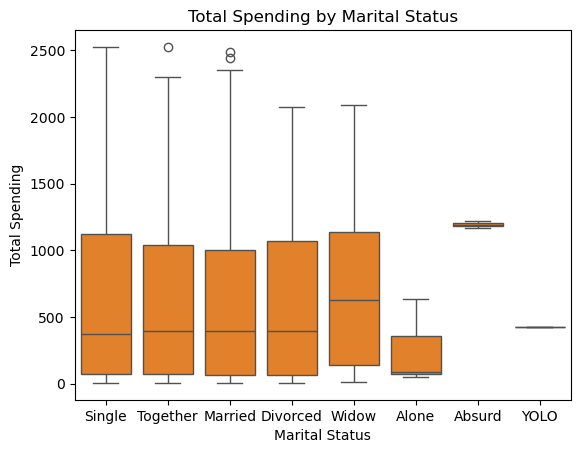

In [108]:
sns.boxplot(x = df["Marital_Status"], y= df["Total_Spending"], data= df, color = 'C1')
plt.title("Total Spending by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Total Spending");

Text(0.5, 1.0, 'Income by Education')

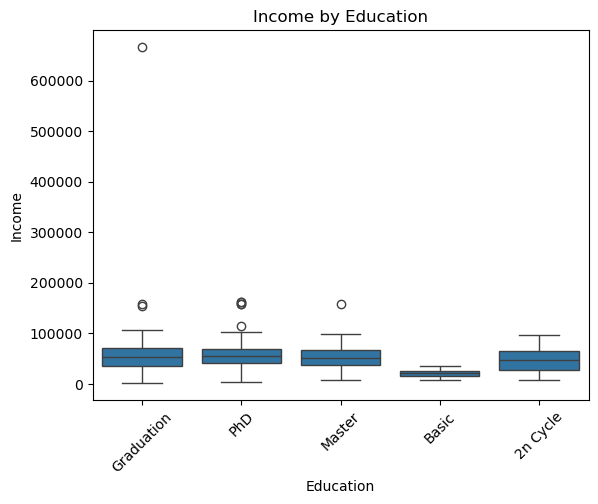

In [109]:
sns.boxplot(x = "Education", y = "Income", data = df)
plt.xticks(rotation = 45)
plt.title("Income by Education")

### Correlation Analysis

In [110]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since'],
      dtype='object')

In [116]:
corr = df[["Income", "Total_Spending","NumWebPurchases", "NumStorePurchases"]].corr()

In [117]:
corr

,Income,Total_Spending,NumWebPurchases,NumStorePurchases
Income,1.000,0.668,0.388,0.529
Total_Spending,0.668,1.000,0.529,0.675
NumWebPurchases,0.388,0.529,1.000,0.516
NumStorePurchases,0.529,0.675,0.516,1.000


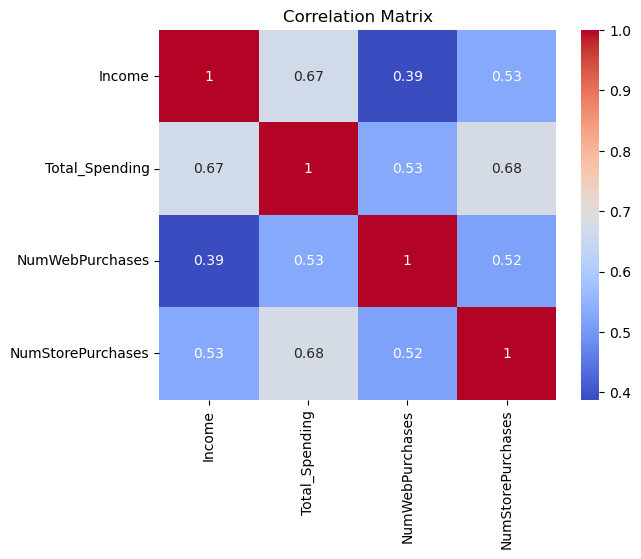

In [118]:
sns.heatmap(corr, annot= True, cmap= 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [119]:
pivot_income = df.pivot_table(values= "Income", index= "Education", columns="Marital_Status", aggfunc= "mean" )

pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130,46201.100,53673.944,44736.411,51392.200,NaN
Basic,NaN,NaN,9548.000,21960.500,18238.667,21240.071,22123.000,NaN
Graduation,79244.000,34176.000,54526.042,50800.259,51322.183,55758.481,54976.657,NaN
Master,65487.000,61331.000,50331.946,53286.029,53530.560,52109.010,58401.545,NaN
PhD,NaN,35860.000,53096.615,58138.032,53314.615,56041.422,60288.083,48432.000


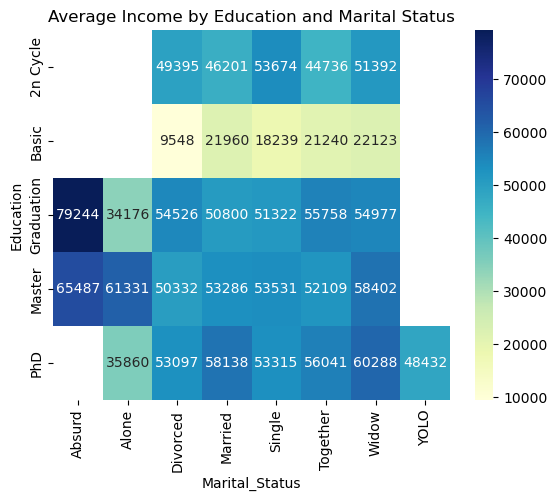

In [123]:
sns.heatmap(pivot_income, annot= True, cmap="YlGnBu", fmt=".0f")
plt.title("Average Income by Education and Marital Status");

In [127]:
group1 = df.groupby("Education")["Total_Spending"].mean().sort_values(ascending= True)

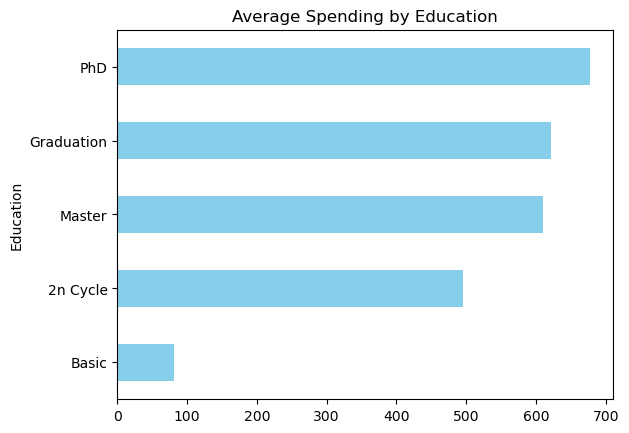

In [128]:
group1.plot(kind= 'barh', color= 'skyblue')
plt.title("Average Spending by Education")
plt.show();

In [132]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since'],
      dtype='object')

In [133]:
df["AcceptedAny"] = df[["AcceptedCmp1",'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5','Response']].sum(axis = 1)

In [136]:
df["AcceptedAny"].unique()

array([1, 0, 3, 2, 4, 5])

In [137]:
df["AcceptedAny"] = df["AcceptedAny"].apply(lambda x : 1 if x > 0 else  0)

In [138]:
df["AcceptedAny"].unique()

array([1, 0])

In [142]:
group2 = df.groupby("Marital_Status")["AcceptedAny"].mean().sort_values(ascending= True)

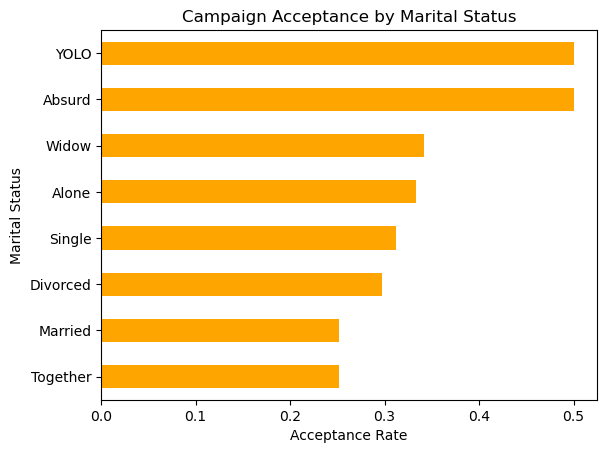

In [145]:
group2.plot(kind= 'barh', color= 'orange')
plt.title("Campaign Acceptance by Marital Status")
plt.ylabel("Marital Status")
plt.xlabel("Acceptance Rate")
plt.show();

In [147]:
bins = [18, 30, 40, 50, 60, 70, 90]

labels = ["18-29", '30-39', '40-49','50-59','60-69', '70+']

df["AgeGroup"] = pd.cut(df["Age"], bins = bins, labels = labels)

In [148]:
df["AgeGroup"].head()

0    50-59
1    60-69
2    40-49
3    30-39
4    30-39
Name: AgeGroup, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [149]:
group3 = df.groupby("AgeGroup")["Income"].mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_15136\1140876350.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby("AgeGroup")["Income"].mean()


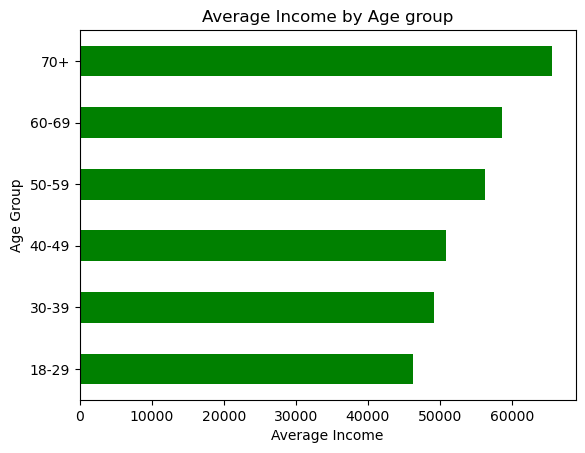

In [151]:
group3.plot(kind= 'barh', color = 'green')
plt.title("Average Income by Age group")
plt.xlabel("Average Income")
plt.ylabel("Age Group")
plt.show();

### Feature Selection & Preprocessing

In [152]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'AgeGroup'],
      dtype='object')

In [156]:
features = ["Age", "Income",'Recency',"NumWebPurchases","NumStorePurchases",'Total_Spending','NumWebVisitsMonth']

X = df[features].copy()

In [157]:
X.head()

,Age,Income,Recency,NumWebPurchases,NumStorePurchases,Total_Spending,NumWebVisitsMonth
0,58,58138.000,58,8,4,1617,7
1,61,46344.000,38,1,2,27,5
2,50,71613.000,26,8,10,776,4
3,31,26646.000,26,2,4,53,6
4,34,58293.000,94,5,6,422,5


In [ ]:
scaler = StandardScaler()

X_scaler = scaler.fit_transform(X)



numpy.ndarray

In [160]:
wcss = []

for i in range(2,13):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X_scaler)
    wcss.append(kmeans.inertia_)

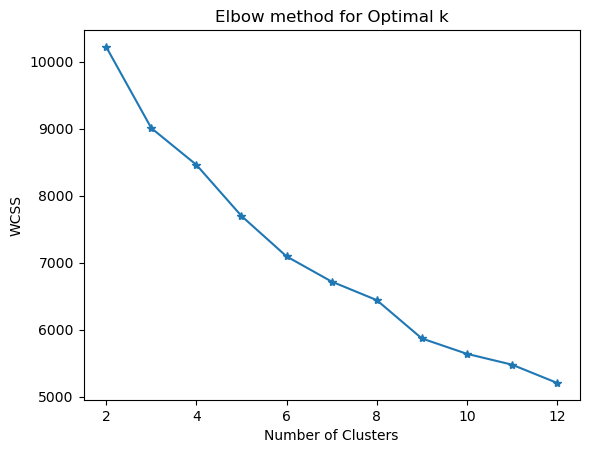

In [161]:
plt.plot(range(2,13),wcss, marker = "*")
plt.title("Elbow method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()